# Multi-Agent Music Store Demo

This notebook demonstrates the multi-agent customer support system for a digital music store. The agent can:
- Answer questions about the music catalog (artists, albums, songs, genres)
- Retrieve invoice and purchase history information
- Remember user preferences across conversations


## Setup


In [1]:
from dotenv import load_dotenv
load_dotenv()

from uuid import uuid4
from langchain.messages import HumanMessage
from langgraph.types import Command

# Import the compiled multi-agent graph
from agents.agent import graph

08:51:03 langgraph.checkpoint.redis INFO   Redis client is a standalone client
08:51:03 langgraph.store.redis INFO   Redis standalone client detected for RedisStore.


## Visualize the Graph


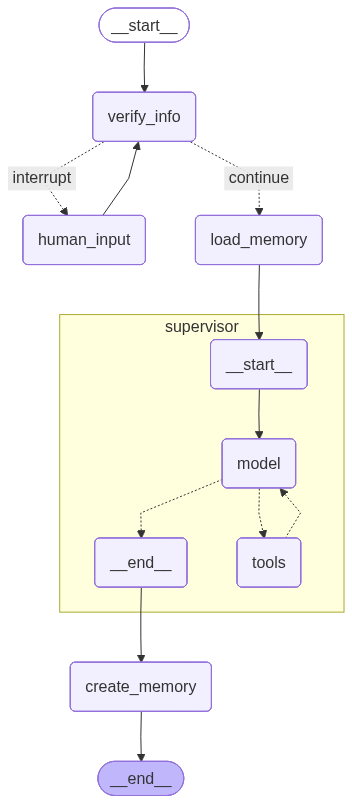

In [2]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

## Demo 1: Music Catalog Query

Ask about albums by an artist. Note: The system will first ask for account verification.


In [3]:
# Create a new thread for this conversation
thread_id = str(uuid4())
config = {"configurable": {"thread_id": thread_id}}

# Initial query - system will ask for verification
result = graph.invoke(
    {"messages": [HumanMessage(content="What albums do you have by The Rolling Stones?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()


08:51:06 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:51:07 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
================================ Human Message =================================

What albums do you have by The Rolling Stones?
================================== Ai Message ==================================

I'd be happy to help you with that! Before I can provide information about our available albums by The Rolling Stones, could you please provide your customer ID, email address, or phone number to verify your account? Thank you!


In [4]:
# Provide account info and resume
result = graph.invoke(
    Command(resume="My customer ID is 1"),
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()

08:51:18 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:51:23 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
music catalog subagent input: Retrieve the full list of albums by The Rolling Stones currently available in the store catalog for customer ID 1. Include album title, release year, edition (standard/deluxe/remaster), and availability to purchase/stream, plus any regional restrictions.
08:51:25 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:51:27 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:51:38 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:51:38 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
================================ Human Message =================================

What albums do you ha

## Demo 2: Invoice Query

Ask about purchase history (using same thread - already verified).


In [5]:
# Follow-up question in same thread (no re-verification needed)
result = graph.invoke(
    {"messages": [HumanMessage(content="What was my most recent invoice?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()


08:52:51 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
made it here
invoice subagent input: Retrieve the most recent invoice for customer ID 1. Include invoice number, invoice date/time, total amount and currency, tax and discounts, payment method, status (paid/refunded/pending), and detailed line items (track/album name, artist, quantity, unit price). Provide a downloadable link or PDF reference if available.
08:52:52 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:52:56 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:53:08 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:53:09 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
================================ Human Message =================================

What albums do you have by The Rolling Stones?
==

## Demo 3: Combined Query

Ask a question that requires both subagents.


In [6]:
# New thread with pre-provided customer ID
thread_id = str(uuid4())
config = {"configurable": {"thread_id": thread_id}}

result = graph.invoke(
    {"messages": [HumanMessage(content="My ID is 10. How much was my last purchase and what rock songs do you have?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()


08:53:18 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:53:31 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
music catalog subagent input: List available Rock songs in the catalog. Please return a concise selection of currently available Rock tracks (title • artist • price), prioritize top/popular and new releases. Limit 15 results and include track IDs for quick add-to-cart.
made it here
invoice subagent input: Retrieve the most recent purchase for customer ID 10, including invoice number, date, total amount, currency, and payment method.
08:53:32 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:53:33 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:53:34 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:53:36 httpx INFO   HTTP Request: POST https://api.

## Demo 4: Genre Search


In [7]:
# Continue in same thread
result = graph.invoke(
    {"messages": [HumanMessage(content="What jazz songs do you have?")]},
    config=config
)

for msg in result["messages"]:
    msg.pretty_print()

08:54:25 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
music catalog subagent input: List available Jazz songs in the catalog. Please return a concise selection of currently available Jazz tracks (title • artist • price). Prioritize top/popular and new releases. Limit 15 results and include track IDs for quick add-to-cart. If possible, also highlight any Jazz tracks that match the user’s saved preferences.
08:54:26 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:54:31 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:54:39 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
08:54:40 httpx INFO   HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
================================ Human Message =================================

My ID is 10. How much was my last purchase and what r